## 1. Load the data

In [38]:
import pandas as pd

df = pd.read_csv('financial_regression.csv')
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


## 2. Data Preprocessing
### 2.1. Missing values

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [ ]:
# Convert the date column to 3 columns which includes the date, month and year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df.drop(columns=['date'], inplace=True)
df.head()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high-low,gold open,gold high,gold low,gold close,gold volume,year,month,day,day_of_week
0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,...,1.16,111.51,112.37,110.79,112.03,18305238.0,2010,1,14,3
1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,...,1.36,111.35,112.01,110.38,110.86,18000724.0,2010,1,15,4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,18,0
3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,...,1.38,110.95,111.75,110.83,111.52,10467927.0,2010,1,19,1
4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,...,2.14,109.97,110.05,108.46,108.94,17534231.0,2010,1,20,2


Drop the columns us_rates_%, CPI, GDP cause they have many null values.

In [41]:
df = df.drop(columns=['us_rates_%', 'CPI', 'GDP'])

In [44]:
# Identify rows where all features except 'date' are NaN
empty_feature_rows = df.drop(columns=['year', 'month', 'day', 'day_of_week']).isna().all(axis=1)
print("Rows with only date and no data:", empty_feature_rows.sum())

# Remove rows where all features except 'date' are NaN  
df = df[~df.drop(columns=['year', 'month', 'day', 'day_of_week']).isna().all(axis=1)]


Rows with only date and no data: 168


In [45]:
df.isnull().sum()

sp500 open            17
sp500 high            17
sp500 low             17
sp500 close           17
sp500 volume          17
sp500 high-low        17
nasdaq open           17
nasdaq high           17
nasdaq low            17
nasdaq close          17
nasdaq volume         17
nasdaq high-low       17
usd_chf               42
eur_usd               42
silver open           17
silver high           17
silver low            17
silver close          17
silver volume         17
silver high-low       17
oil open              17
oil high              17
oil low               17
oil close             17
oil volume            17
oil high-low          17
platinum open         17
platinum high         17
platinum low          17
platinum close        17
platinum volume       17
platinum high-low     17
palladium open        17
palladium high        17
palladium low         17
palladium close       17
palladium volume      17
palladium high-low    17
gold open             17
gold high             17


In [47]:
# Fill missing values with the mean of each column
df = df.copy()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
eur_usd               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low              0
gold close      

### 2.2. Correlation Matrix 

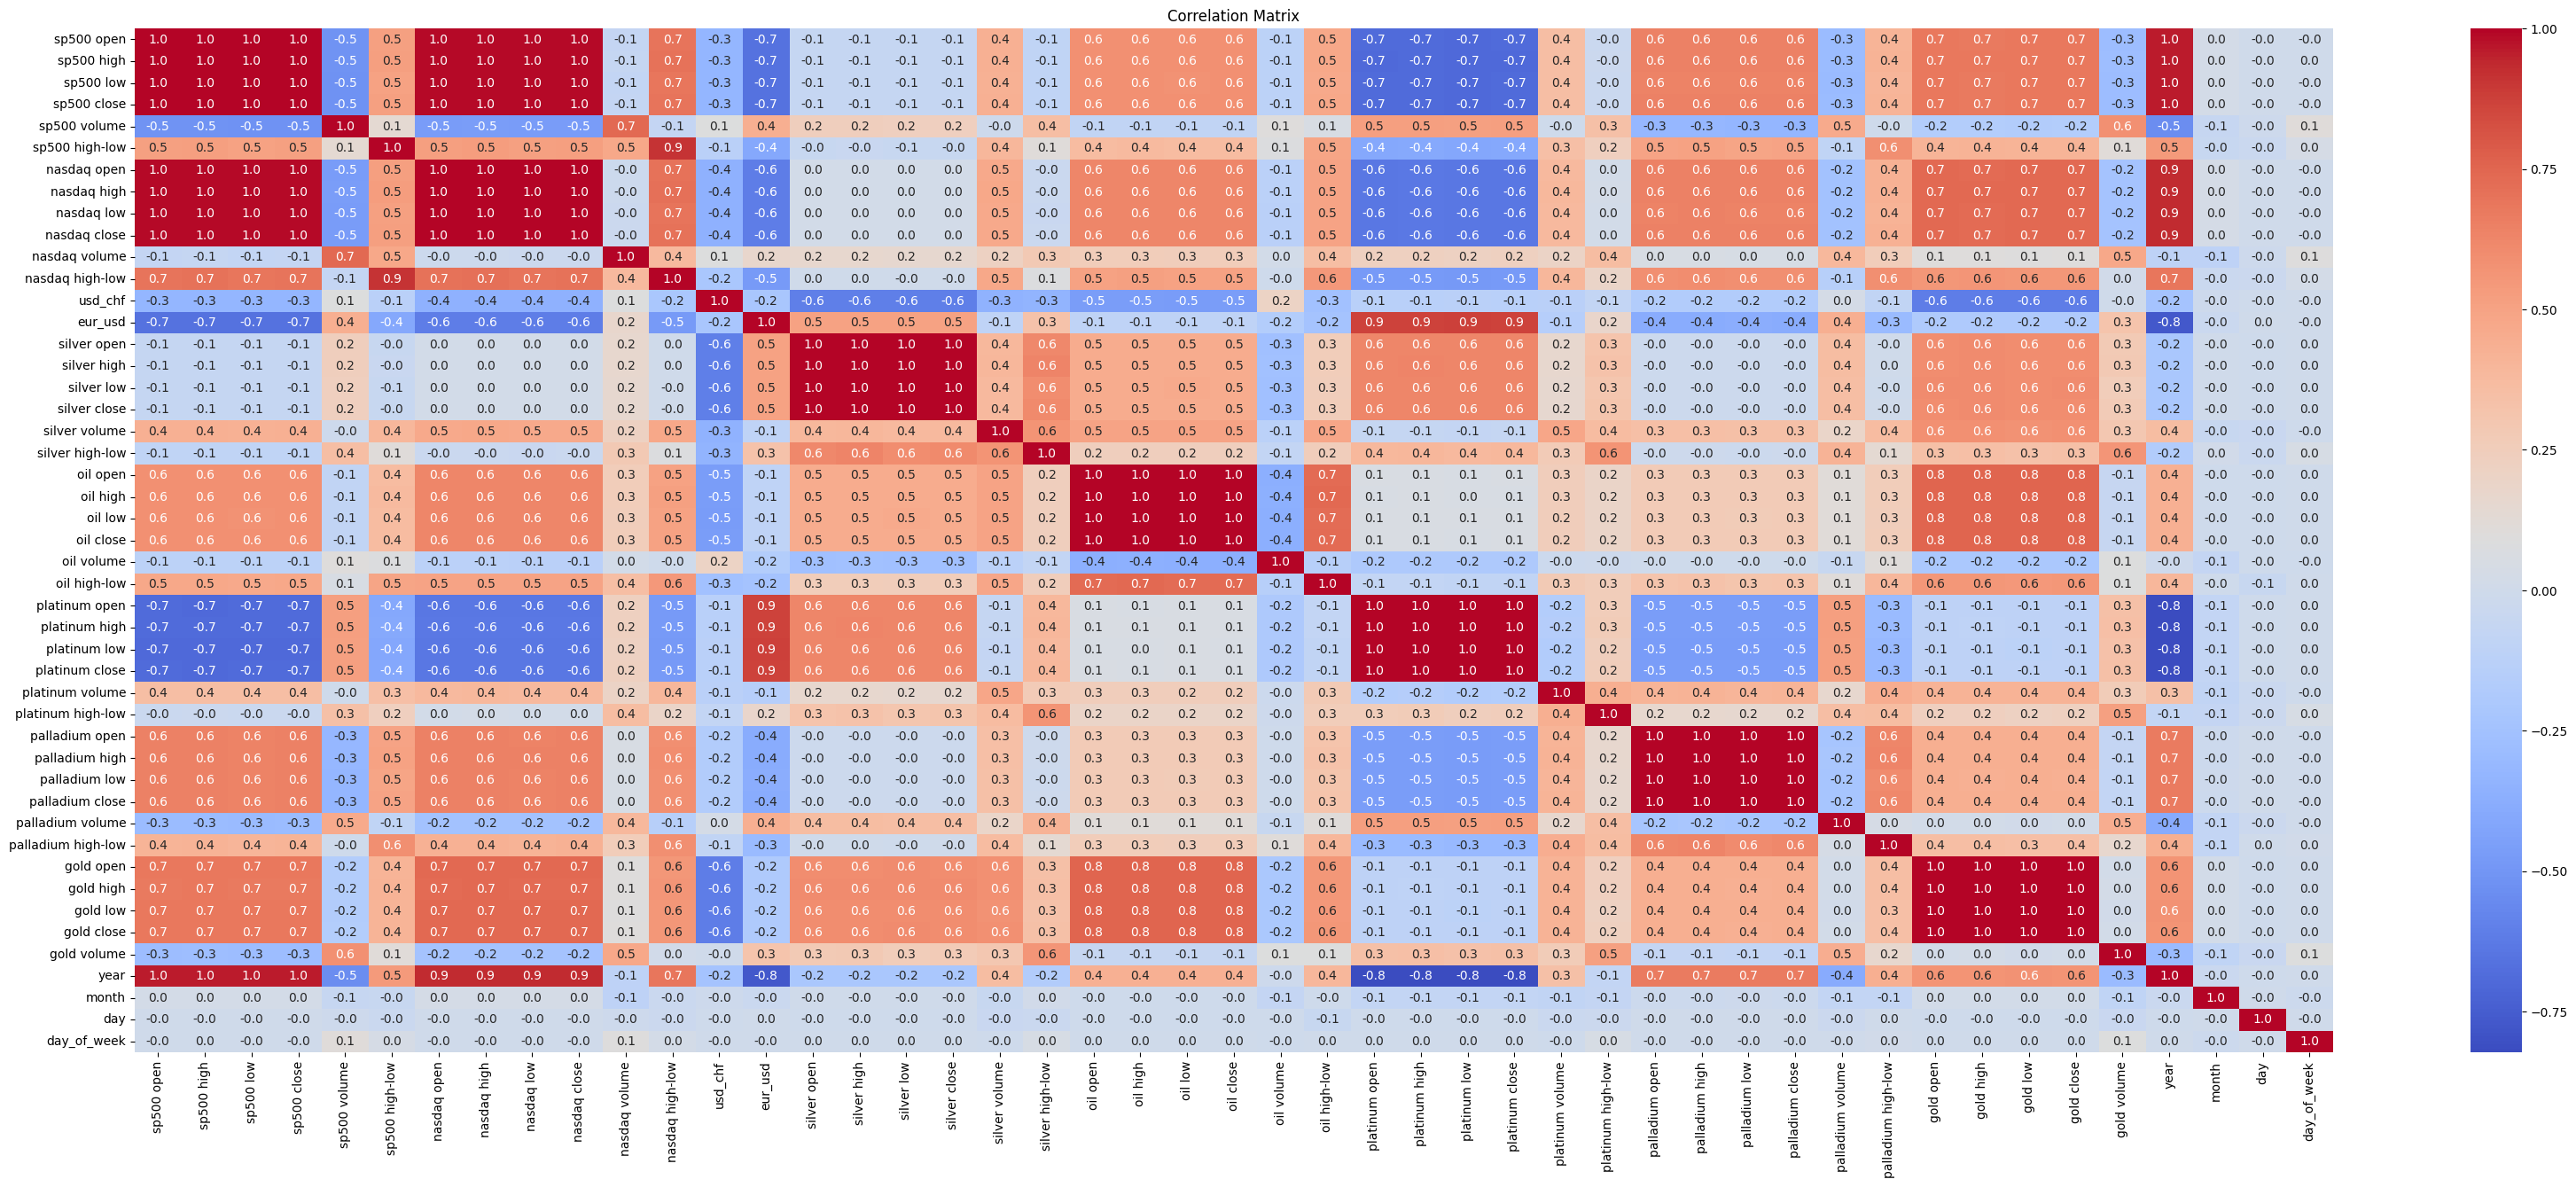

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()    
plt.figure(figsize=(40, 15))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
